In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss,r2_score,mean_squared_error
import sklearn.neural_network as net

Text(0, 0.5, '平方损失值')

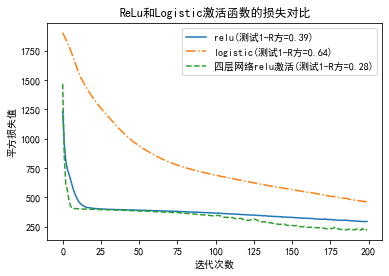

In [2]:
data=pd.read_excel('北京市空气质量数据.xlsx')
data=data.replace(0,np.NaN)
data=data.dropna()
data=data.loc[(data['PM2.5']<=200) & (data['SO2']<=20)]
X=data[['SO2','CO','NO2','O3']]
Y=data['PM2.5']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123)

acts=['relu','logistic']
lts=['-','-.']
for lt,act in zip(lts,acts):
    NeuNet=net.MLPRegressor(activation=act,random_state=123,hidden_layer_sizes=(100,))
    NeuNet.fit(X_train,Y_train)
    Y_pred=NeuNet.predict(X_test)
    plt.plot(NeuNet.loss_curve_,label=act+"(测试1-R方=%.2f)"%(1-r2_score(Y_test,Y_pred)),linestyle=lt)

NeuNet=net.MLPRegressor(activation='relu',random_state=123,hidden_layer_sizes=(100,50))
NeuNet.fit(X_train,Y_train)
Y_pred=NeuNet.predict(X_test)
plt.plot(NeuNet.loss_curve_,label="四层网络relu激活(测试1-R方=%.2f)"%(1-r2_score(Y_test,Y_pred)),linestyle='--')
plt.legend()
plt.title("ReLu和Logistic激活函数的损失对比")
plt.xlabel("迭代次数")
plt.ylabel("平方损失值")


说明：这里基于空气质量监测数据，采用多层网络预测PM2.5浓度。
1、利用MLPRegressor函数实现基于多层网络的回归预测。
2、MLPRegressor对象有很多属性，其中loss_curve_存储了各次迭代时的损失值。此外还有coefs_、intercepts_等，分别存储各个节点的连接权重和偏差权重。